## Introduction to ML Algorithms: Linear Regression
- Build your own model from scratch

#### What is linear regression??

Before knowing what is linear regression, let us get ourselves accustomed to regression. Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.



![title](https://cdn-images-1.medium.com/max/1000/0*szXvH1a4ZQytyqhg.png)

Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. The red line in the above graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best. The line can be modelled based on the linear equation shown below.

y = a_0 + a_1 * x

The motive of the linear regression algorithm is to find the best values for a_0 and a_1. Before moving on to the algorithm, let’s have a look at two important concepts you must know to better understand linear regression.

The cost function helps us to figure out the best possible values for a_0 and a_1 which would provide the best fit line for the data points. Since we want the best values for a_0 and a_1, we convert this search problem into a minimization problem where we would like to minimize the error between the predicted value and the actual value.
![title](https://cdn-images-1.medium.com/max/1000/1*wQCSNJ486WxL4mZ3FOYtgw.png)
---------------------------------------"Minimization and Cost Function"-----------------------------------------------------------

We choose the above function to minimize. The difference between the predicted values and ground truth measures the error difference. We square the error difference and sum over all data points and divide that value by the total number of data points. This provides the average squared error over all the data points. Therefore, this cost function is also known as the Mean Squared Error(MSE) function. Now, using this MSE function we are going to change the values of a_0 and a_1 such that the MSE value settles at the minima.

### Gradient Descent

The next important concept needed to understand linear regression is gradient descent. Gradient descent is a method of updating a_0 and a_1 to __reduce the cost function(MSE)__. The idea is that we start with some values for a_0 and a_1 and then we change these values iteratively to reduce the cost. Gradient descent helps us on how to change the values.

![title](https://cdn-images-1.medium.com/max/1000/0*QwE8M4MupSdqA3M4.png)

__In the gradient descent algorithm, the number of steps you take is the learning rate. This decides on how fast the algorithm converges to the minima.__

##### Sometimes the cost function can be a non-convex function where you could settle at a local minima but for linear regression, it is always a convex function.
![title](https://cdn-images-1.medium.com/max/750/0*GrBkYv2vodl_swFI.png)

![title](https://cdn-images-1.medium.com/max/750/1*D4Q7zeRBmZ3z1CbD37CIhg.png)

The partial derivates are the gradients and they are used to update the values of a_0 and a_1. Alpha is the learning rate which is a hyperparameter that you must specify. A smaller learning rate could get you closer to the minima but takes more time to reach the minima, a larger learning rate converges sooner but there is a chance that you could overshoot the minima.
__For linear regression Cost Function graph is always convex shaped__

![title](https://www.ctsc.org.za/wp-content/uploads/2017/03/Lets-Code-Web-Block-300x200.png)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Data(X)-Acidity of Milk Data(Y)- Density of Milk

In [2]:
def readData(filename):
    df=pd.read_csv(filename)
    return df.values.reshape((len(df),))

In [3]:
x=readData("linearX.csv")
y=readData("linearY.csv")

In [4]:
print(x)

[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]


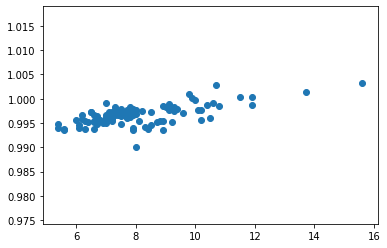

In [5]:
#plot the data 
plt.scatter(x,y)

In [6]:
#Lets shift the origin for the tha data , normalize it[its just shifting]
X=(x-x.mean())/x.std()
Y=y
print(X.shape[0])

99


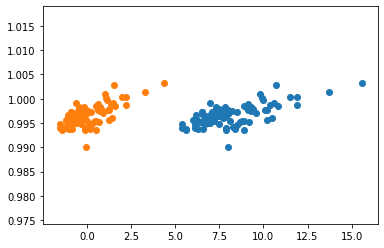

In [7]:
plt.scatter(x,y)
plt.scatter(X,Y)
plt.show()


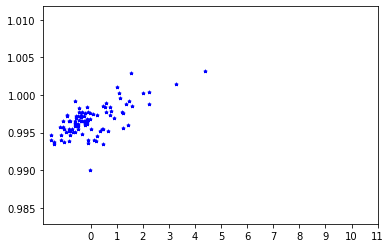

In [8]:
plt.scatter(X,Y,s=10,marker='*',color='b')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
plt.show()

## Algorithm - Linear Regression!
#### Gradient Algorithm
- Start with a random theta
- Repeat until converge
    - Update theta according to the rule
 
    <img src="images/grad.jpeg" alt="drawing" style="width:490px;"/>
    <img src="images/grad2.jpeg" alt="drawing" style="width:490px;"/>



$$\theta = \theta - \eta \cdot \nabla_\theta J( \theta)$$

__Gradient descent__ is a way to minimize an objective function J(θ) parameterized by a model's parameters θ∈R^d by updating the parameters in the opposite direction of the gradient of the objective function  w.r.t. to the parameters. The learning rate η determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the objective function downhill until we reach a valley.

In [9]:
#Refer above copy pages if any doubt
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    total_error=0
    m=X.shape[0]
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        total_error += (hx-Y[i])**2
    return total_error

def grad_aka_slope(X,Y,theta):
    grad=np.zeros((2,))
    m=len(X)
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        #delJ(theta)/delJ(theta 0)
        grad[0] += (hx-Y[i])
        #delJ(theta)/delJ(theta 1)
        grad[1] += (hx-Y[i])*X[i]
    return grad
    
def gradientDescent(X,Y,learning_rate=0.0009):
    theta=np.array([-2.0,0.0])
#     theta=np.zeros((2,))
    itr=0
    maxitr=1000
    error_list=[]
    theta_list=[]
    while(itr<=maxitr):
        
        grad=grad_aka_slope(X,Y,theta)
        e=error(X,Y,theta)
        theta_list.append([theta[0],theta[1]])
        error_list.append(e)
        theta[0]=theta[0] - learning_rate*grad[0]
        theta[1]=theta[1] - learning_rate*grad[1]
#         print(theta)
        itr +=1
    return theta,error_list,theta_list

In [10]:
final_theta,error_list,theta_list=gradientDescent(X,Y)

Above model is called __Simple Linear Regression__ because there is only one input variable (x). __If there were more input variables (e.g. x1, x2, etc.) then this would be called multiple regression.__


In [11]:
print(theta_list[0:10])
theta_list=np.array(theta_list)
print(theta_list[0:10])

[[-2.0, 0.0], [-1.732999898, 0.00012099243338765184], [-1.4897895050882, 0.0002312044409604678], [-1.2682491581848414, 0.0003315965586585303], [-1.066448056190572, 0.00042304373866968776], [-0.882627432383992, 0.0005063429749418405], [-0.7151852261585783, 0.0005822202492621366], [-0.5626621205078489, 0.0006513368584404922], [-0.4237288235705996, 0.0007142951777410443], [-0.29717448339045915, 0.000771643910791914]]
[[-2.00000000e+00  0.00000000e+00]
 [-1.73299990e+00  1.20992433e-04]
 [-1.48978951e+00  2.31204441e-04]
 [-1.26824916e+00  3.31596559e-04]
 [-1.06644806e+00  4.23043739e-04]
 [-8.82627432e-01  5.06342975e-04]
 [-7.15185226e-01  5.82220249e-04]
 [-5.62662121e-01  6.51336858e-04]
 [-4.23728824e-01  7.14295178e-04]
 [-2.97174483e-01  7.71643911e-04]]


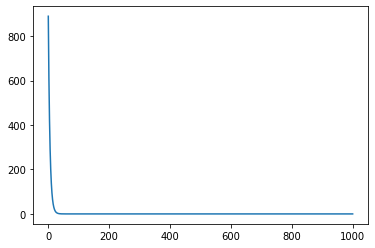

In [12]:
plt.plot(error_list)

In [13]:
#### Plot the line for testing data
print(X[0:10])
xtest=np.linspace(-2,6,9)
print(xtest)


[-0.02980118  0.60654168  0.20159622 -0.66614404 -0.20334923  4.36674951
 -0.43474664 -0.60829469 -0.49259599  1.18503519]
[-2. -1.  0.  1.  2.  3.  4.  5.  6.]


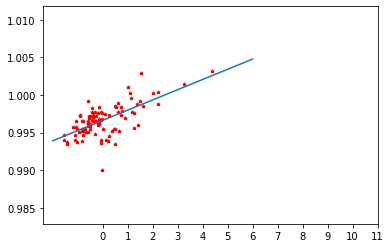

In [14]:
plt.scatter(X,Y,s=10,marker='*',color='r')
plt.plot(xtest,hypothesis(xtest,final_theta))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
plt.show()

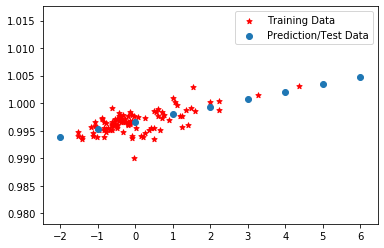

In [15]:
plt.scatter(X,Y,s=30,marker='*',color='r',label='Training Data')
plt.scatter(xtest,hypothesis(xtest,final_theta),label='Prediction/Test Data')
plt.legend()
plt.show()

### Convergence — We didn’t talk about how to determine when the search finds a solution. This is typically done by looking for small changes in error iteration-to-iteration (e.g., where the gradient is near zero).
![title](https://miro.medium.com/max/875/1*huvbsdKFNJp45SoOcgwmHw.png)


## 3D Surface Plots /3D Plotting in Python
U can refer on this link-
https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html


In order to use Matplotlib, the mplot3d toolkit that is included with the Matplotlib installation has to be imported:



In [16]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
#An Axes3D object is created just like any other axes 
#using the projection=‘3d’ keyword

### Using np.meshgrid()
- the np.meshgrid() function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays
- np.meshgrid() is particularly useful if you want to evaluate functions on a grid, as the code 
- The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing
 - __Creating a "meshgrid"__

![title](https://www.python-course.eu/images/creating_a_meshgrid.png)

##  __Calculation of the Values__
![title](https://www.python-course.eu/images/calculation_of_the_contour_values.png)


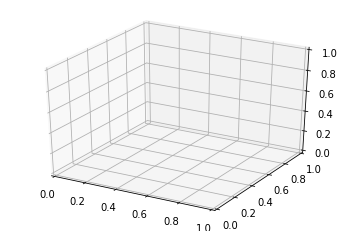

In [17]:
#Then, to create a 3D axes you can execute this code
fig=plt.figure()
axes=fig.gca(projection='3d')
#It is inside this 3D axes that a plot can be drawn,
#it is important to know what type of plot (or combination of plots) will be better to describe the data.

### 3D Contour Plots:

- The input for the contour plot is a bit different , as it needs the data on a two dimmensional grid, note that after assigning values for x and y, they are combined on a grid by executing “np.meshgrid(x, y)” and then the Z values are created from executing the function f(X,Y) with the values of the grid (Z=f(X,Y)).
### Wireframes:
This type of graph also works with data on a grid, notice it takes the variables X, Y, Z we created above which are a grid.
<br>
#fig = plt.figure()<br>
#ax = plt.axes(projection='3d')<br>
#ax.plot_wireframe(X, Y, Z, color='black')

In [18]:
a=np.arange(-4,4,0.01)
b=a
a,b=np.meshgrid(a,b)

print(a)
print(b)

[[-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 ...
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]]
[[-4.   -4.   -4.   ... -4.   -4.   -4.  ]
 [-3.99 -3.99 -3.99 ... -3.99 -3.99 -3.99]
 [-3.98 -3.98 -3.98 ... -3.98 -3.98 -3.98]
 ...
 [ 3.97  3.97  3.97 ...  3.97  3.97  3.97]
 [ 3.98  3.98  3.98 ...  3.98  3.98  3.98]
 [ 3.99  3.99  3.99 ...  3.99  3.99  3.99]]


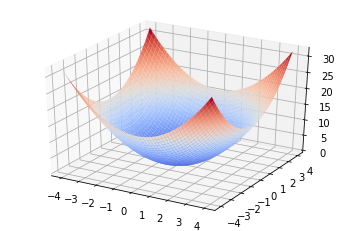

In [19]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='coolwarm')
plt.show()

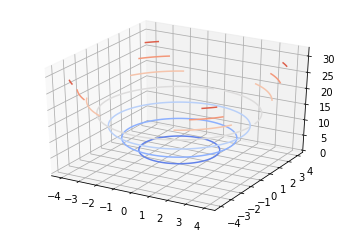

In [20]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(a,b,a**2+b**2,cmap='coolwarm')
plt.show()

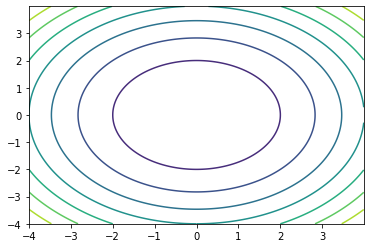

In [21]:
plt.contour(a,b,a**2+ b**2)

Besides 3D wires, and planes, one of the most popular 3-dimensional graph types is 3D scatter plots. The idea of 3D scatter plots is that you can compare 3 characteristics of a data set instead of two.

This tutorial covers how to do just that with some simple sample data. Here is the code that generates a basic 3D scatter plot 

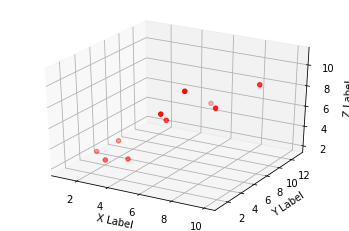

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Visualizing the gradient descent method
- Understanding concepts of error surfaces and contour maps is required then we are good to go for visualizing different optimization algorithms
- Plotting Error Surface and Contours

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
T0=np.arange(-2,3,0.01)
T1=np.arange(-2,3,0.01)

T0,T1=np.meshgrid(T0,T1)

J=np.zeros(T0.shape)

m=T0.shape[0]
n=T1.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j]=np.sum((Y-T1[i,j]*X-T0[i,j])**2)


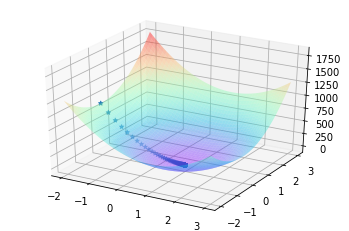

In [25]:
## Plot the axes
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,marker='*')
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=0.4)
plt.show()

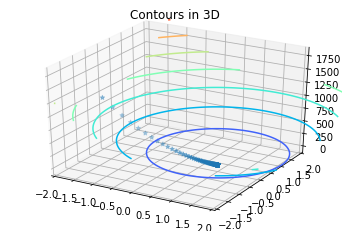

In [26]:
## Plot the axes
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,marker='*')
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])

plt.title('Contours in 3D')
plt.show()

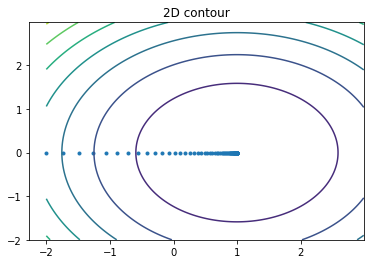

In [27]:
plt.contour(T0,T1,J)
plt.scatter(theta_list[:,0],theta_list[:,1],marker='.')
# print(np.unique(theta_list))
plt.title('2D contour')

plt.show()